In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df= pd.read_csv("FreezerData2.csv", skiprows=2)

In [4]:
df.rename(columns={"2546":"Date","Unnamed: 2":"Time"},inplace=True)

In [5]:
df["Time"]=df["Time"]. astype(str)
df["Date"]=df["Date"]. astype(str)

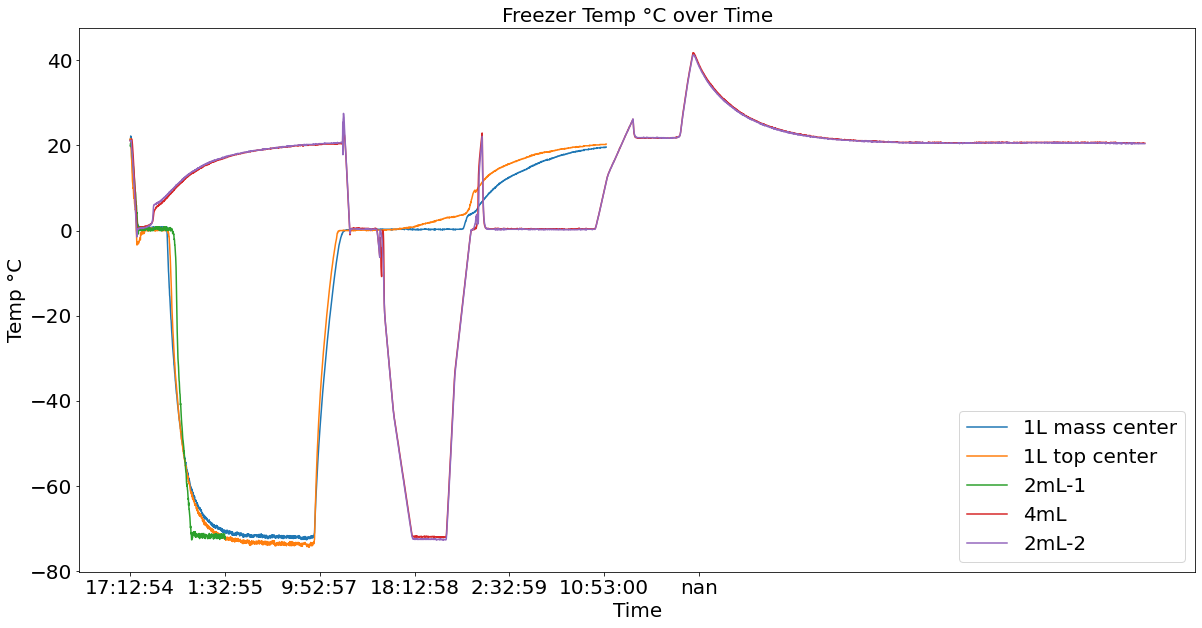

In [12]:
ax= plt.gca()
plt.rcParams["figure.figsize"]= (20,10)
df.plot(kind="line", x="Time", y="1L mass center", ax=ax, fontsize=20)
df.plot(kind="line", x="Time", y="1L top center", ax=ax, fontsize=20)
df.plot(kind="line", x="Time", y="2mL-1", ax=ax, fontsize=20)
df.plot(kind="line", x="Time", y="4mL", ax=ax, fontsize=20)
df.plot(kind="line", x="Time", y="2mL-2", ax=ax, fontsize=20)
plt.ylabel("Temp °C",fontsize=20)
plt.xlabel("Time", fontsize=20)
plt.title("Freezer Temp °C over Time", fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [13]:
df=df.loc[0:2510]


In [14]:
dff = df.loc[1129:1856,("4mL","2mL-2")]
dff=dff.reset_index(drop=True)





In [17]:
trace1 = go.Line(
        x=df.index,
        y=df["1L mass center"],
        name="1L mass center")
trace2= go.Line(
        x=df.index,
        y=df["1L top center"],
        name="1L top center")
trace3= go.Line(
        x=dff.index,
        y=dff["4mL"],
        name="4mL")
trace4= go.Line(
        x=df.index,
        y=df["2mL-1"],
        name="2mL-1")
trace5=go.Line(
        x=dff.index,
        y=dff["2mL-2"],
        name="2mL-2")


fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)
fig.add_trace(trace5)
fig.update_layout(title="Freezer Temp °C over Δ Time", xaxis_title="Δ Time (Mins)", yaxis_title="Temp °C")
fig.show()